## Uber Trips Analysis

In [137]:
# Import libraries
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import plotly.express as px

In [138]:
# Reading excel file and looking at first 5 rows
data=pd.read_excel("C:/Users/User/Downloads/Projects/Software Village/uber_trips.xlsx")

data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,51,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,48,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,47,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,637,Customer Visit


In [139]:
# Changing of START_DATE and END_DATE columns type
data["START_DATE"] = data["START_DATE"].map(pd.to_datetime)
data["END_DATE"] = data["END_DATE"].map(pd.to_datetime)

data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,51,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5,NaN
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,48,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,47,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,637,Customer Visit


In [140]:
# Looking at some proporties of data
data.shape

(1155, 7)

In [141]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1155 non-null   datetime64[ns]
 1   END_DATE    1155 non-null   datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1155 non-null   int64         
 6   PURPOSE     653 non-null    object        
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 63.3+ KB


In [142]:
# Creating of Year, Month, Day, DayofWeek columns
data["Year"] = data["START_DATE"].apply(lambda x: x.year)
data["Month"] = data["START_DATE"].apply(lambda x: x.month)
data["Day"] = data["START_DATE"].apply(lambda x: x.day)
data["DayofWeek"] = data["START_DATE"].apply(lambda x: x.dayofweek)

data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Year,Month,Day,DayofWeek
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,51,Meal/Entertain,2016,1,1,4
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5,NaN,2016,1,2,5
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,48,Errand/Supplies,2016,1,2,5
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,47,Meeting,2016,1,5,1
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,637,Customer Visit,2016,1,6,2


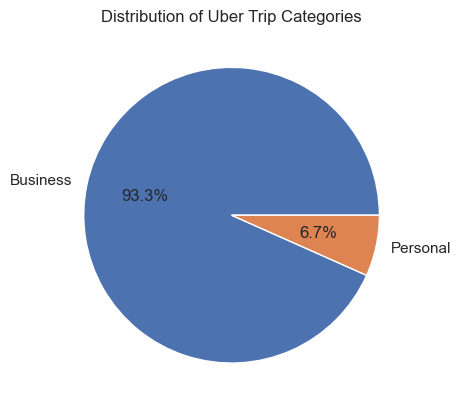

In [143]:
# Visualization the percentage of CATEGORY items
category_counts = data['CATEGORY'].value_counts()

plt.pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Uber Trip Categories')
plt.show()

Text(0, 0.5, 'Number of Trips')

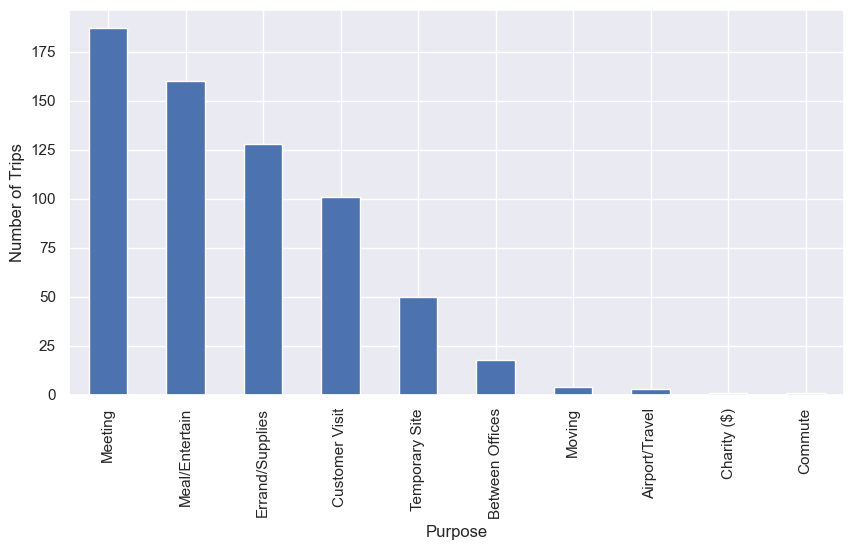

In [144]:
# The number of trips for each purpose
purpose = data['PURPOSE'].value_counts()
purpose.plot(kind='bar',figsize=(10,5))
plt.xlabel('Purpose')
plt.ylabel('Number of Trips')

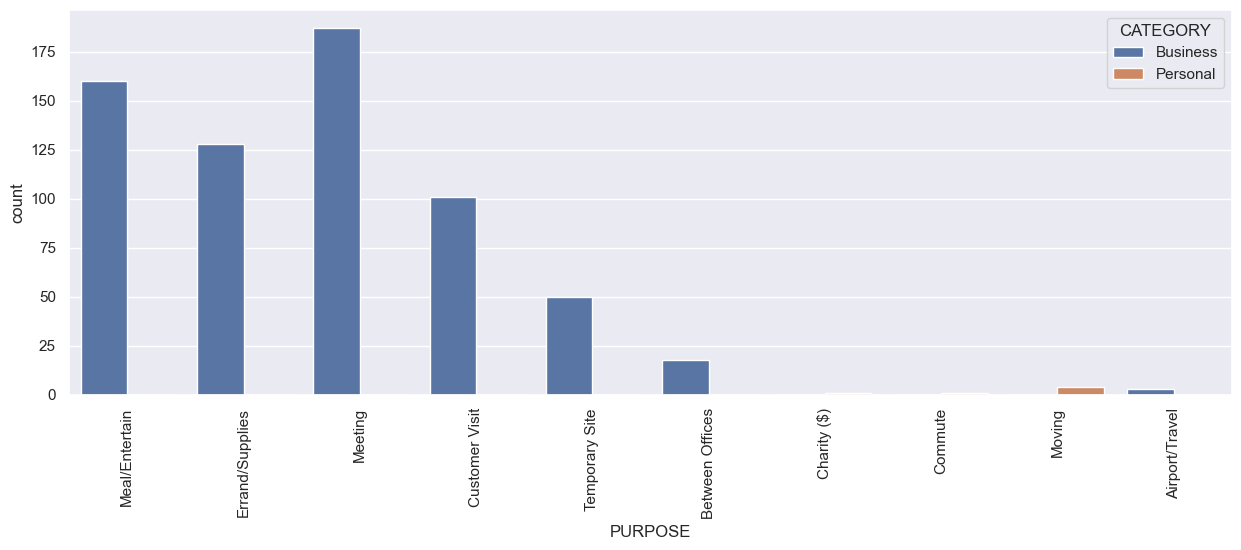

In [145]:
# Visualization count of trips of each PURPOSE for each CATEGORY
plt.figure(figsize=(15, 5))
sns.countplot(data=data, x='PURPOSE', hue='CATEGORY')
plt.xticks(rotation=90)
plt.show()

Text(0, 0.5, 'Purpose')

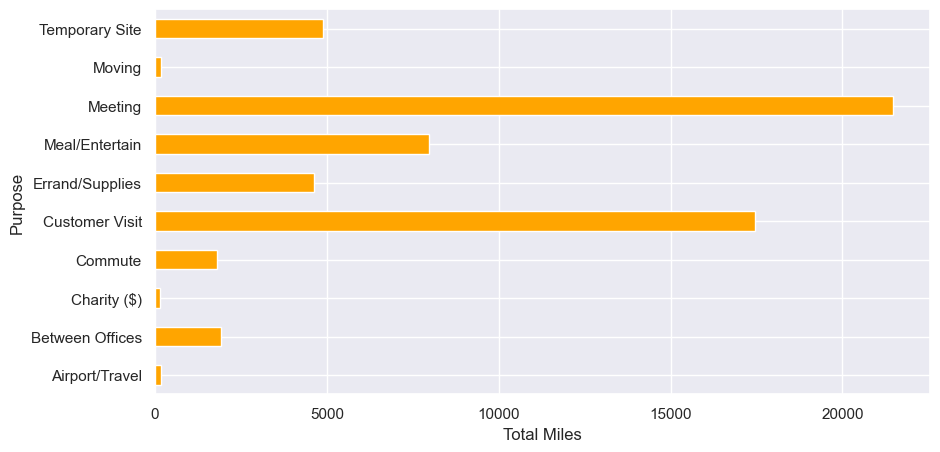

In [164]:
# Visualization of total miles for each purpose
purpose_miles = data.groupby('PURPOSE')['MILES'].sum()

purpose_miles.plot(kind='barh', figsize=(10, 5),color='orange')
plt.xlabel('Total Miles')
plt.ylabel('Purpose')

Text(0, 0.5, 'Starting point')

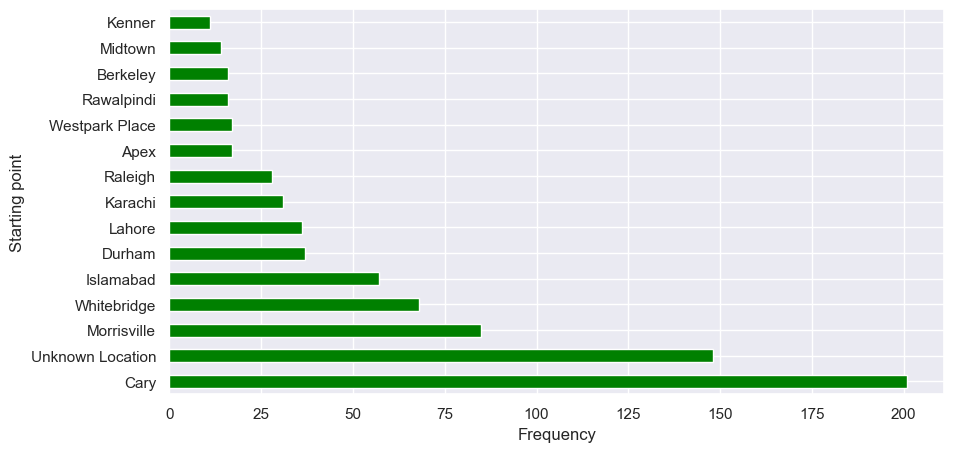

In [147]:
# Visualization of the first 15 starting points frequency
months = data['START'].value_counts().nlargest(15)
months.plot(kind='barh',color='green',figsize=(10,5))
plt.xlabel('Frequency')
plt.ylabel('Starting point')

Text(0, 0.5, 'Stopping point')

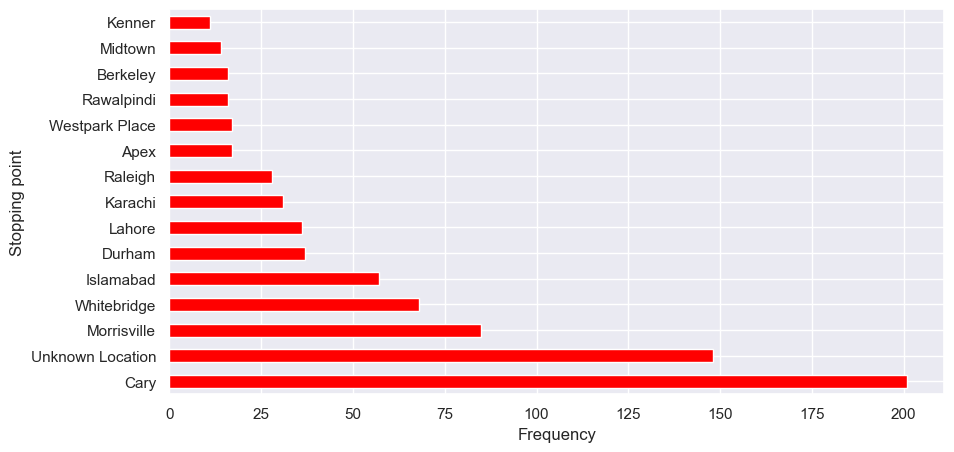

In [148]:
# Visulization of the first 15 stopping points frequency
months = data['START'].value_counts().nlargest(15)
months.plot(kind='barh',color='red',figsize=(10,5))
plt.xlabel('Frequency')
plt.ylabel('Stopping point')

Text(0, 0.5, 'Count')

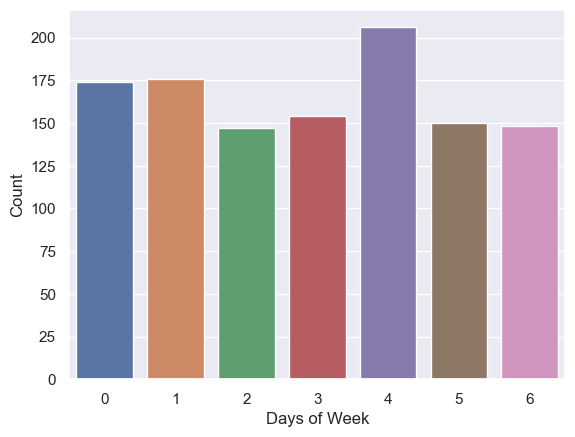

In [160]:
# Visualization for the days of the week
days = data.DayofWeek.value_counts()
sns.barplot(x=days.index, y=days);
plt.xlabel('Days of Week')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

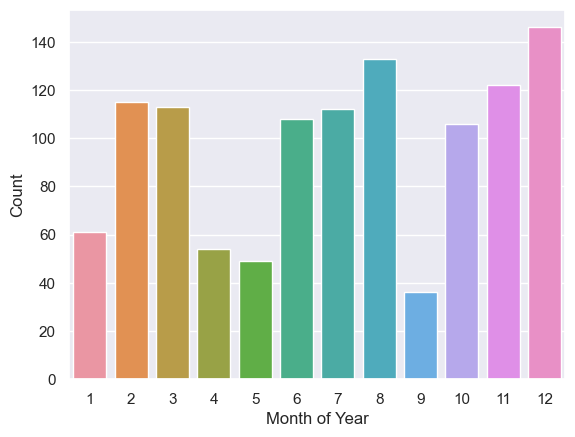

In [162]:
# Visualization for the months of the year
days = data.Month.value_counts()
sns.barplot(x=days.index, y=days)
plt.xlabel('Month of Year')
plt.ylabel('Count')

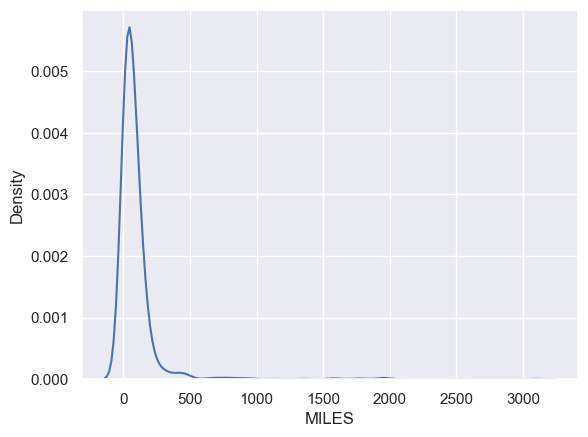

In [151]:
# Visualization of MILES with Bell Curve
sns.set(style="darkgrid")
sns.kdeplot(data['MILES'])
plt.show()

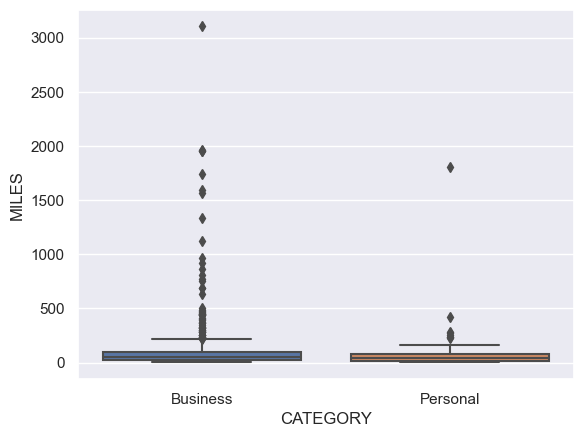

In [152]:
# Visualization of CATEGORY and MILES columns with boxplot
sns.boxplot(x='CATEGORY', y='MILES', data=data)
plt.show()

<Figure size 1000x500 with 0 Axes>

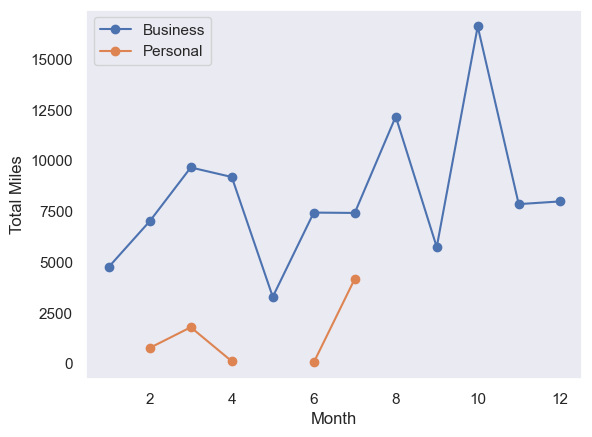

In [153]:
# Visualization of total miles for each month and each category with line chart
grouped_data = data.groupby(['CATEGORY', 'Month'])['MILES'].sum().reset_index()

pivot_table = grouped_data.pivot(index='Month', columns='CATEGORY', values='MILES')

plt.figure(figsize=(10, 5))
pivot_table.plot(marker='o')
plt.xlabel('Month')
plt.ylabel('Total Miles')
plt.legend()
plt.grid()

plt.show()

<Axes: xlabel='Day', ylabel='Month'>

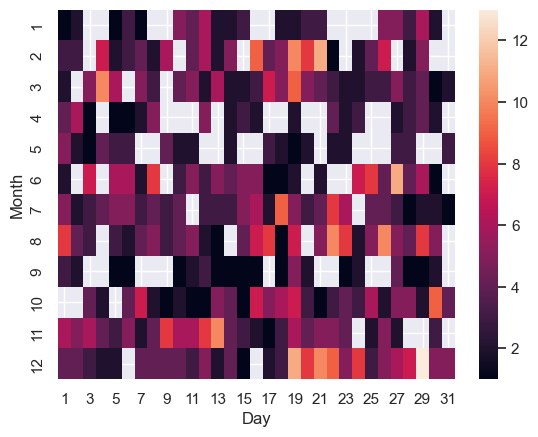

In [154]:
# Correlation Month and Day columns with Heatmap
df = data.groupby(["Month", "Day"]).apply(lambda x: len(x))
df = df.unstack()
sns.heatmap(df, annot=False)